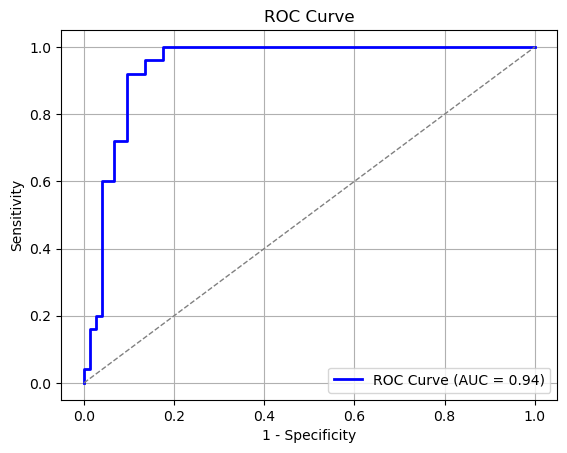

In [9]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the data
synthetic_data = np.load(r'D:\微量元素与图神经网络\微量元素与图神经网络\synthetic_data.npy')
synthetic_labels = np.load(r'D:\微量元素与图神经网络\微量元素与图神经网络\synthetic_labels.npy')

# Ensure labels are binary (0 and 1)
synthetic_labels = synthetic_labels.astype(int)

# Define sliding window size
window_size = synthetic_data.shape[1]  # Assuming 3 as per user instruction

# Flatten the data for dynamic isolation forest
flattened_data = []
for i in range(synthetic_data.shape[0]):
    window = synthetic_data[i, :window_size, :]
    flattened_data.append(window.flatten())
flattened_data = np.array(flattened_data)

# Fit the Isolation Forest model
iso_model = IsolationForest(n_estimators=100, random_state=123)
iso_model.fit(flattened_data)

# Calculate anomaly scores
anomaly_scores = -iso_model.decision_function(flattened_data)

# Normalize anomaly scores between 0 and 1
anomaly_scores = (anomaly_scores - anomaly_scores.min()) / (anomaly_scores.max() - anomaly_scores.min())

# Calculate ROC and AUC
fpr, tpr, _ = roc_curve(synthetic_labels, anomaly_scores)
auc_value = roc_auc_score(synthetic_labels, anomaly_scores)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()

# Save plot to local directory
plt.savefig(r'D:\微量元素与图神经网络\微量元素与图神经网络\dynamic_isolation_forest_ROC.png')
plt.show()


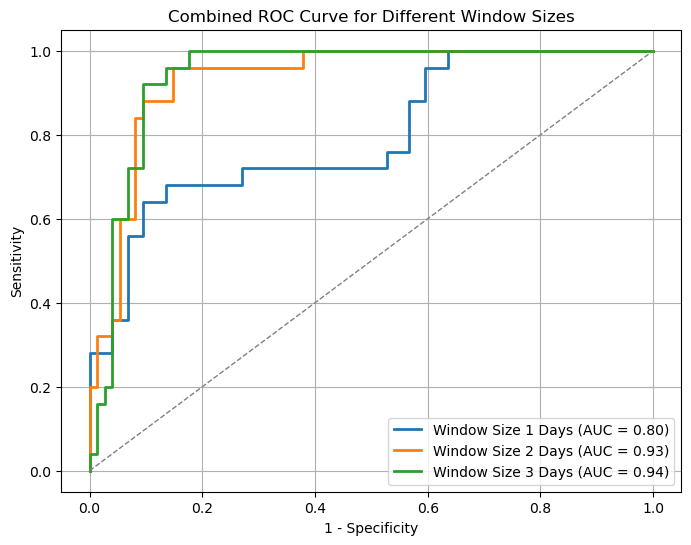

In [12]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the data
synthetic_data = np.load(r'D:\微量元素与图神经网络\微量元素与图神经网络\synthetic_data.npy')
synthetic_labels = np.load(r'D:\微量元素与图神经网络\微量元素与图神经网络\synthetic_labels.npy')

# Ensure labels are binary (0 and 1)
synthetic_labels = synthetic_labels.astype(int)

# Initialize figure for combined ROC curve
plt.figure(figsize=(8, 6))

# Iterate through different window sizes
for window_size in [1, 2, 3]:
    # Flatten the data based on window size
    flattened_data = []
    for i in range(synthetic_data.shape[0]):
        window = synthetic_data[i, :window_size, :]
        flattened_data.append(window.flatten())
    flattened_data = np.array(flattened_data)

    # Fit the Isolation Forest model
    iso_model = IsolationForest(n_estimators=100, random_state=123)
    iso_model.fit(flattened_data)

    # Calculate anomaly scores
    anomaly_scores = -iso_model.decision_function(flattened_data)

    # Normalize anomaly scores between 0 and 1
    anomaly_scores = (anomaly_scores - anomaly_scores.min()) / (anomaly_scores.max() - anomaly_scores.min())

    # Calculate ROC and AUC
    fpr, tpr, _ = roc_curve(synthetic_labels, anomaly_scores)
    auc_value = roc_auc_score(synthetic_labels, anomaly_scores)

    # Plot ROC Curve for the current window size
    plt.plot(fpr, tpr, lw=2, label=f'Window Size {window_size} Days (AUC = {auc_value:.2f})')

# Add plot details
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Combined ROC Curve for Different Window Sizes')
plt.legend(loc="lower right")
plt.grid()

# Save plot to local directory
plt.savefig(r'D:\微量元素与图神经网络\微量元素与图神经网络\combined_ROC_window_sizes.png')
plt.show()


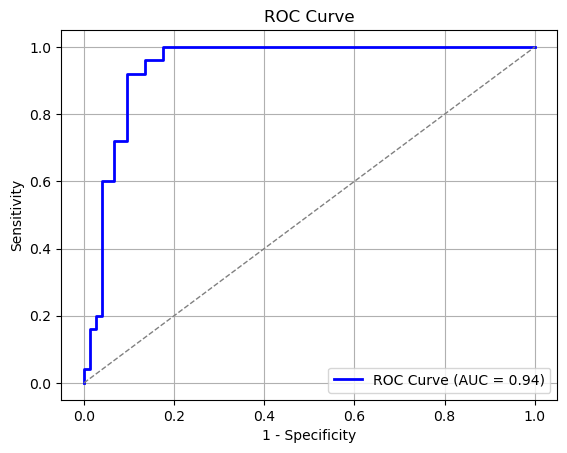

Accuracy: 0.8990
Precision: 0.7419
Recall: 0.9200
F1 Score: 0.8214
Cohen's Kappa: 0.7521

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9706    0.8919    0.9296        74
   Anomalous     0.7419    0.9200    0.8214        25

    accuracy                         0.8990        99
   macro avg     0.8563    0.9059    0.8755        99
weighted avg     0.9128    0.8990    0.9023        99



In [11]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, classification_report
import matplotlib.pyplot as plt

# Load the data
synthetic_data = np.load(r'D:\微量元素与图神经网络\微量元素与图神经网络\synthetic_data.npy')
synthetic_labels = np.load(r'D:\微量元素与图神经网络\微量元素与图神经网络\synthetic_labels.npy')

# Ensure labels are binary (0 and 1)
synthetic_labels = synthetic_labels.astype(int)

# Define sliding window size
window_size = synthetic_data.shape[1]  # Assuming 3 as per user instruction

# Flatten the data for dynamic isolation forest
flattened_data = []
for i in range(synthetic_data.shape[0]):
    window = synthetic_data[i, :window_size, :]
    flattened_data.append(window.flatten())
flattened_data = np.array(flattened_data)

# Fit the Isolation Forest model
iso_model = IsolationForest(n_estimators=100, random_state=123)
iso_model.fit(flattened_data)

# Calculate anomaly scores
anomaly_scores = -iso_model.decision_function(flattened_data)

# Normalize anomaly scores between 0 and 1
anomaly_scores = (anomaly_scores - anomaly_scores.min()) / (anomaly_scores.max() - anomaly_scores.min())

# Calculate ROC and AUC
fpr, tpr, _ = roc_curve(synthetic_labels, anomaly_scores)
auc_value = roc_auc_score(synthetic_labels, anomaly_scores)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()

# Save plot to local directory
plt.savefig(r'D:\微量元素与图神经网络\微量元素与图神经网络\dynamic_isolation_forest_ROC.png')
plt.show()

# Use Isolation Forest's built-in prediction method
predicted_labels = iso_model.predict(flattened_data)

# Convert predicted labels from {-1, 1} to {0, 1}
predicted_labels = (predicted_labels == -1).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(synthetic_labels, predicted_labels)
precision = precision_score(synthetic_labels, predicted_labels)
recall = recall_score(synthetic_labels, predicted_labels)
f1 = f1_score(synthetic_labels, predicted_labels)
kappa = cohen_kappa_score(synthetic_labels, predicted_labels)

# Generate full classification report
classification_rep = classification_report(synthetic_labels, predicted_labels, target_names=['Normal', 'Anomalous'], digits=4)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")
print("\nClassification Report:")
print(classification_rep)
